# Multi regression model - Tennis players project

Hi everybody, the next project is based on the ATP (Association Tennis Profesional) data about the performance of tennis players. All the details about the general metrics and statistics could be find in the following url:

https://www.atptour.com/en/rankings/singles

The main goal is understand through the regression techniques what are the main components to be an all-star tennis player. 

PD: This project was worked with codecademy ML path.

The next descriptions, will be useful to know the stucture of this sport:

### General data

* Player: name of the tennis player
* Year: year data was recorded

### Service Game Columns (Offensive)

* Aces: number of serves by the player where the receiver does not touch the ball
* DoubleFaults: number of times player missed both first and second serve attempts
* FirstServe: % of first-serve attempts made
* FirstServePointsWon: % of first-serve attempt points won by the player
* SecondServePointsWon: % of second-serve attempt points won by the player
* BreakPointsFaced: number of times where the receiver could have won service game of the player
* BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
* ServiceGamesPlayed: total number of games where the player served
* ServiceGamesWon: total number of games where the player served and won
* TotalServicePointsWon: % of points in games where the player served that they won

### Return Game Columns (Defensive)

* FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
* SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
* BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
* BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
* ReturnGamesPlayed: total number of games where the player’s opponent served
* ReturnGamesWon: total number of games where the player’s opponent served and the player won
* ReturnPointsWon: total number of points where the player’s opponent served and the player won
* TotalPointsWon: % of points won by the player

### Outcomes

* Wins: number of matches won in a year
* Losses: number of matches lost in a year
* Winnings: total winnings in USD($) in a year
* Ranking: ranking at the end of year



# Exploratory Data Analysis (EDA)

Let's take a general look into the features:

In [1]:
# Import classic packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Step 2: Import the csv final file and check the data structure:
data_atp = pd.read_csv('tennis_stats.csv')
data_atp.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
print('Total rows and columns: {}'.format(data_atp.shape))

Total rows and columns: (1721, 24)


In [4]:
for i in (data_atp.columns):
    print('Column {} and number of records: {}'.format(i, data_atp[i].value_counts().sum()))

Column Player and number of records: 1721
Column Year and number of records: 1721
Column FirstServe and number of records: 1721
Column FirstServePointsWon and number of records: 1721
Column FirstServeReturnPointsWon and number of records: 1721
Column SecondServePointsWon and number of records: 1721
Column SecondServeReturnPointsWon and number of records: 1721
Column Aces and number of records: 1721
Column BreakPointsConverted and number of records: 1721
Column BreakPointsFaced and number of records: 1721
Column BreakPointsOpportunities and number of records: 1721
Column BreakPointsSaved and number of records: 1721
Column DoubleFaults and number of records: 1721
Column ReturnGamesPlayed and number of records: 1721
Column ReturnGamesWon and number of records: 1721
Column ReturnPointsWon and number of records: 1721
Column ServiceGamesPlayed and number of records: 1721
Column ServiceGamesWon and number of records: 1721
Column TotalPointsWon and number of records: 1721
Column TotalServicePo

In [5]:
for i in (data_atp.columns):
    print('Column {} and number of is NA values: {}'.format(i, data_atp[i].isna().sum()))

Column Player and number of is NA values: 0
Column Year and number of is NA values: 0
Column FirstServe and number of is NA values: 0
Column FirstServePointsWon and number of is NA values: 0
Column FirstServeReturnPointsWon and number of is NA values: 0
Column SecondServePointsWon and number of is NA values: 0
Column SecondServeReturnPointsWon and number of is NA values: 0
Column Aces and number of is NA values: 0
Column BreakPointsConverted and number of is NA values: 0
Column BreakPointsFaced and number of is NA values: 0
Column BreakPointsOpportunities and number of is NA values: 0
Column BreakPointsSaved and number of is NA values: 0
Column DoubleFaults and number of is NA values: 0
Column ReturnGamesPlayed and number of is NA values: 0
Column ReturnGamesWon and number of is NA values: 0
Column ReturnPointsWon and number of is NA values: 0
Column ServiceGamesPlayed and number of is NA values: 0
Column ServiceGamesWon and number of is NA values: 0
Column TotalPointsWon and number of

In [6]:
data_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

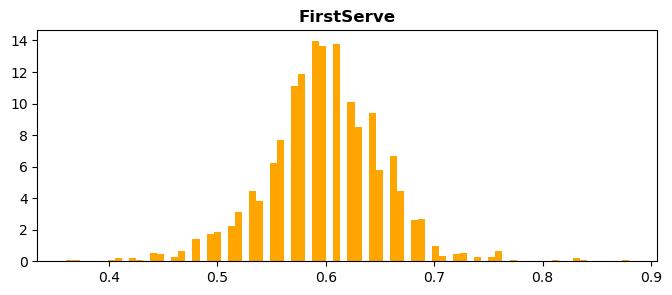

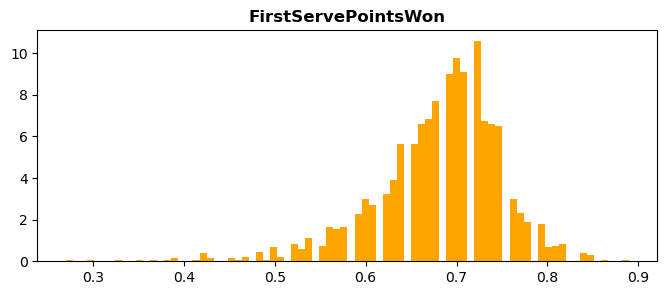

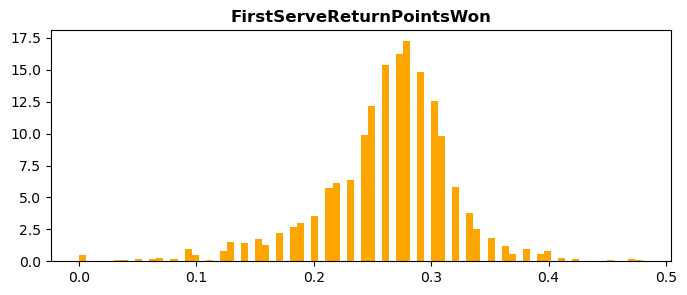

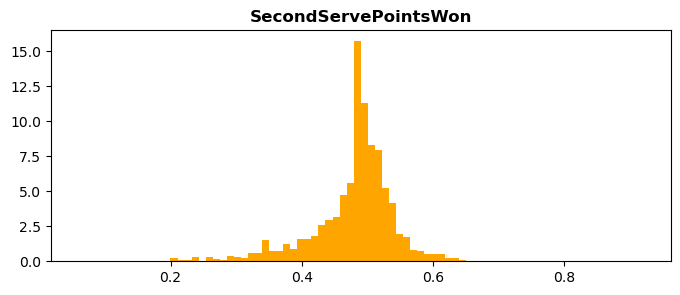

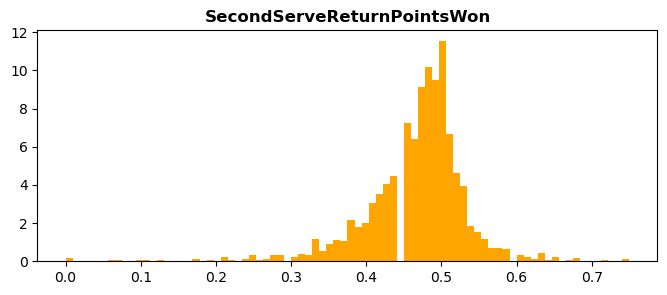

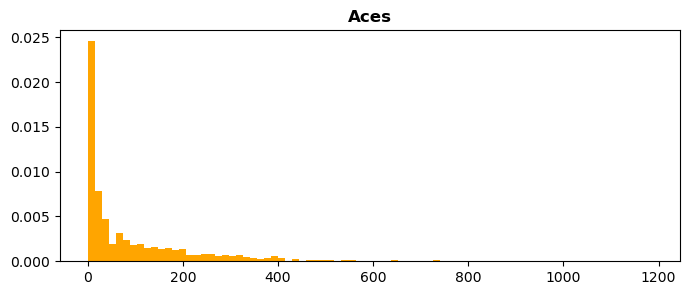

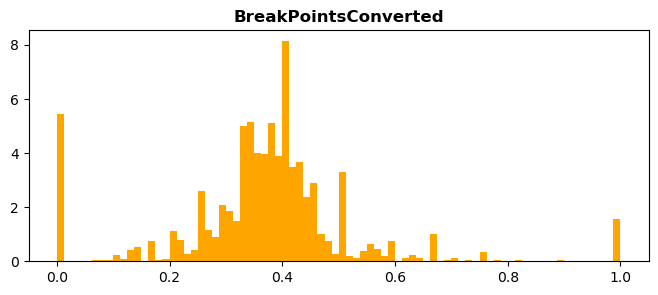

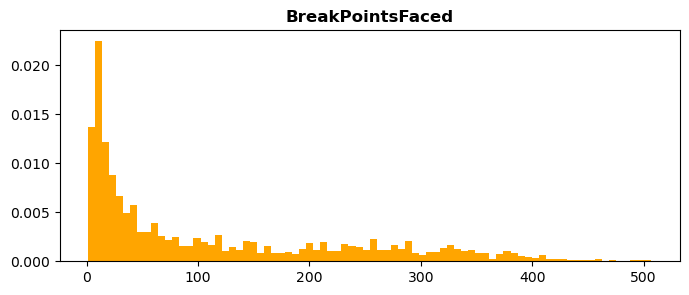

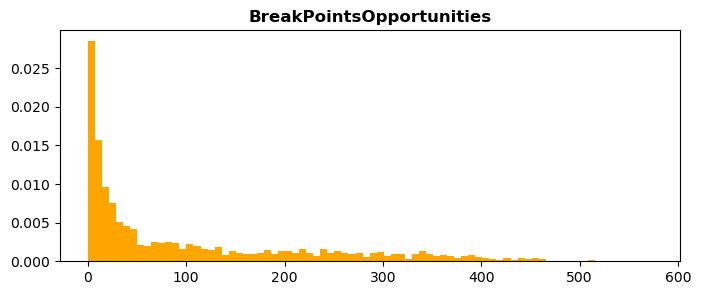

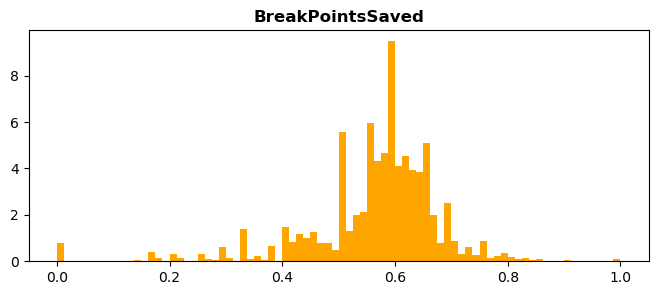

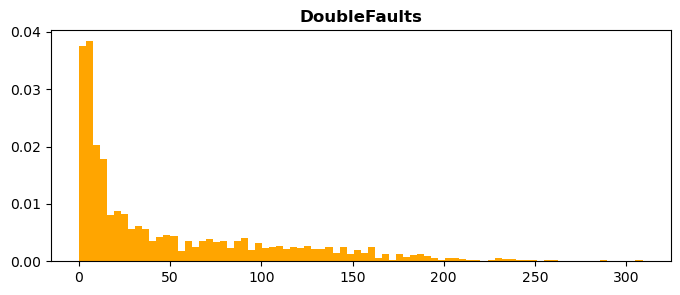

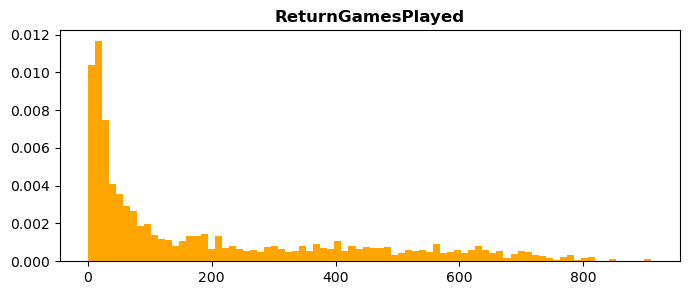

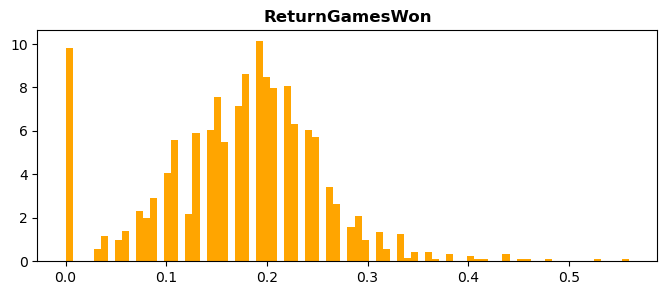

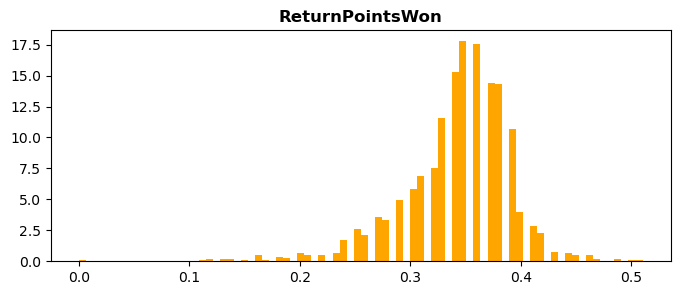

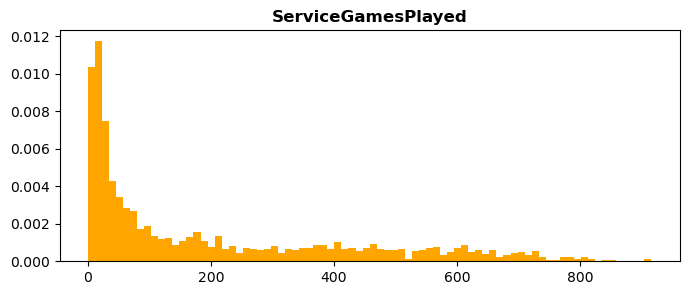

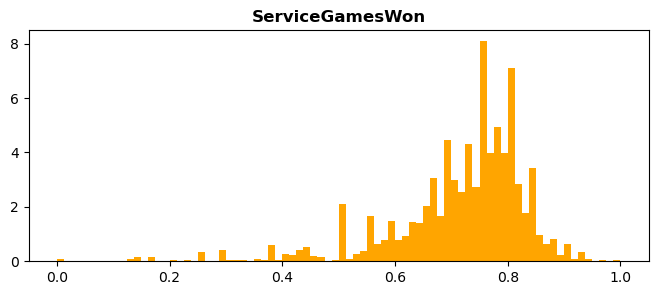

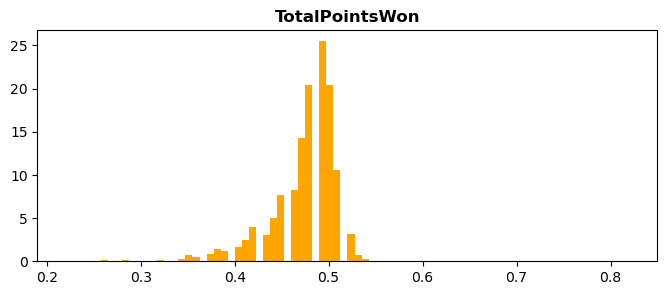

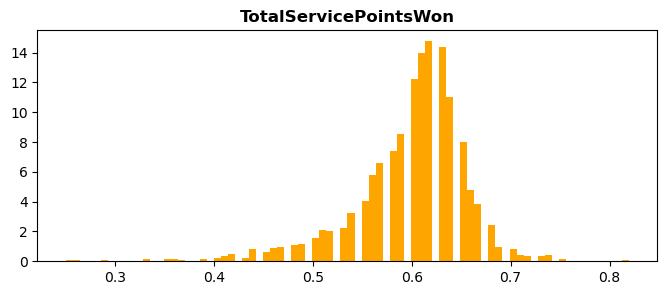

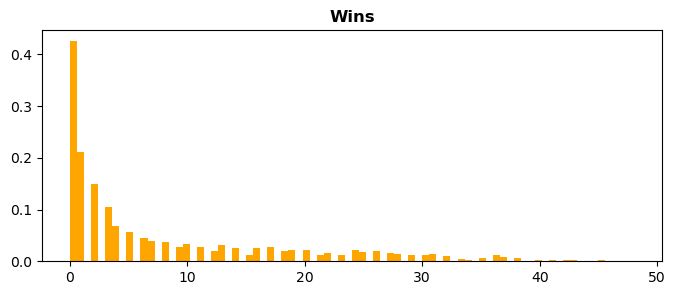

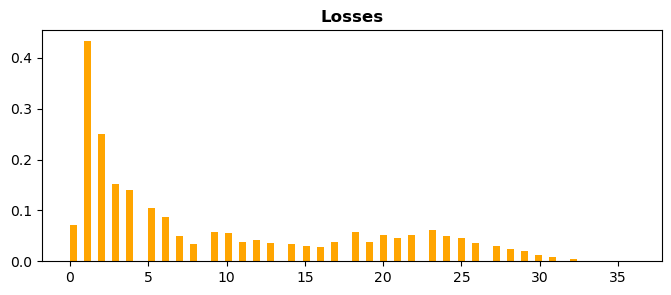

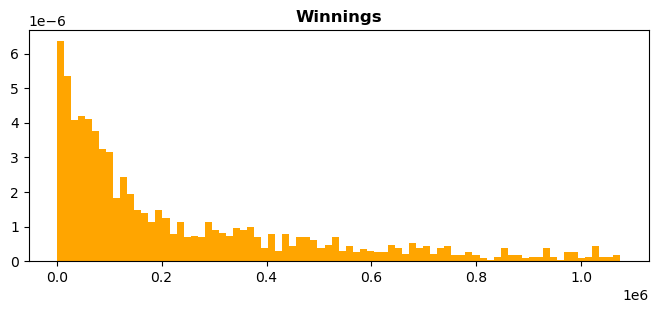

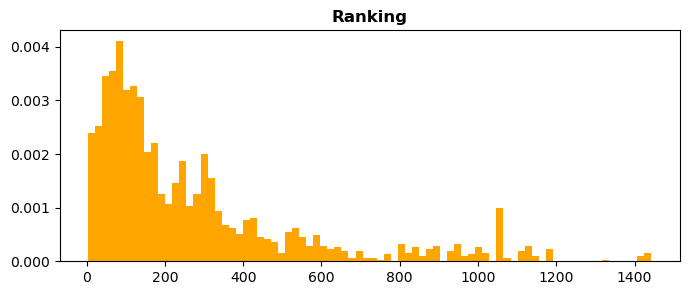

In [7]:
columns_dataset = ['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon',
                   'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted', 'BreakPointsFaced',
                   'BreakPointsOpportunities', 'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed',
                   'ReturnGamesWon','ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
                   'TotalServicePointsWon','Wins','Losses', 'Winnings','Ranking']

for j in columns_dataset:
    plt.figure(figsize=(8, 3))
    plt.title(j, fontweight ="bold")
    data_atp[j].hist(bins=80, color = 'orange', density = True, histtype ='bar')
    plt.grid(visible = None)
    plt.show()

In [37]:
sns.set()

In [36]:
offensive = ['Aces',
             'DoubleFaults',
             'FirstServe',
             'FirstServePointsWon',
             'SecondServePointsWon',
             'BreakPointsFaced',
             'BreakPointsSaved',
             'ServiceGamesPlayed',
             'ServiceGamesWon',
             'TotalServicePointsWon']
defensive = ['FirstServeReturnPointsWon',
             'SecondServeReturnPointsWon',
             'BreakPointsOpportunities',
             'BreakPointsConverted',
             'ReturnGamesPlayed',
             'ReturnGamesWon',
             'ReturnPointsWon',
             'TotalPointsWon']
features = offensive + defensive
outcomes = ['Wins',
            'Losses',
            'Winnings',
            'Ranking']

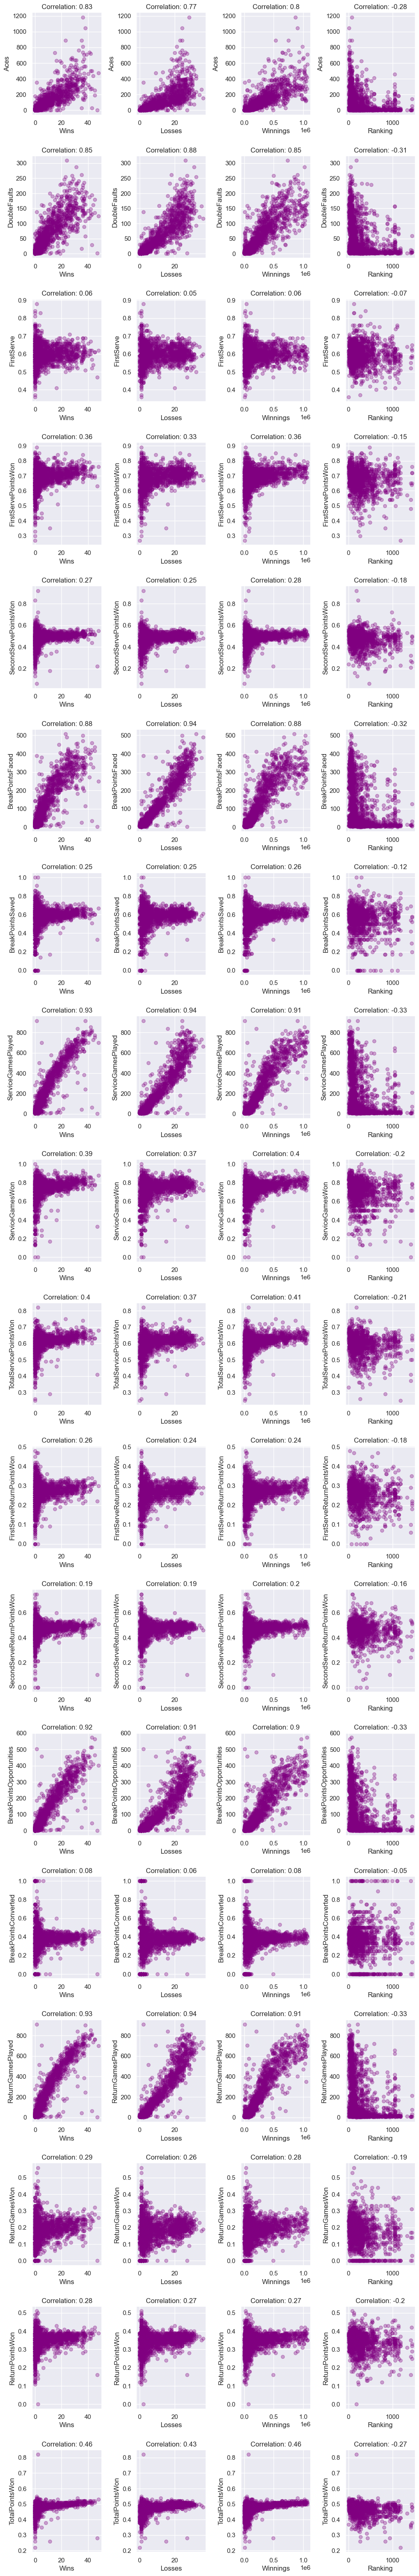

In [60]:
plt.figure(figsize=(12, 80))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for i in range(len(features)):
    for j in range(len(outcomes)):
        plt.subplot(len(features), len(outcomes), 1+i*len(outcomes)+j)
        #print(1+i*len(outcomes)+j)
        plt.scatter(data_atp[outcomes[j]], data_atp[features[i]], alpha=0.33, color = 'purple')
        plt.xlabel(outcomes[j])
        plt.ylabel(features[i])
        plt.title(f'Correlation: {round(data_atp[features[i]].corr(data_atp[outcomes[j]]), 2)}')
plt.show()

Despite of the multiple scatters generated thanks to seaborn, We can get multiple strong relationships between these variables. For instance, We can graph the scatter between __BreakPointsOpportunities__ feature and the __Winnings__ outcome:

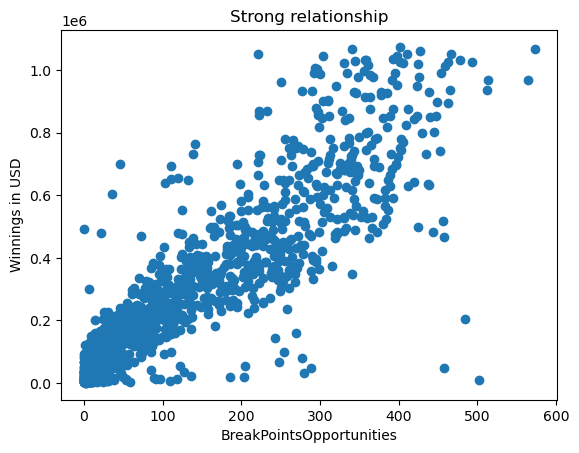

In [9]:
plt.scatter(data_atp['BreakPointsOpportunities'], data_atp['Winnings'])
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings in USD')
plt.title('Strong relationship')
plt.show()

### First model with one predictor:

With the case above, We can stablish the next linear regression model. To this, we get the respective columns with the info to build and instiate the model:

In [11]:
one_feature = data_atp[['BreakPointsOpportunities']]
one_outcome = data_atp[['Winnings']]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(one_feature, one_outcome, train_size= 0.8)

In [13]:
first_model = LinearRegression()

In [14]:
first_model.fit(x_train, y_train)

LinearRegression()

In [15]:
prediction = first_model.predict(x_test)

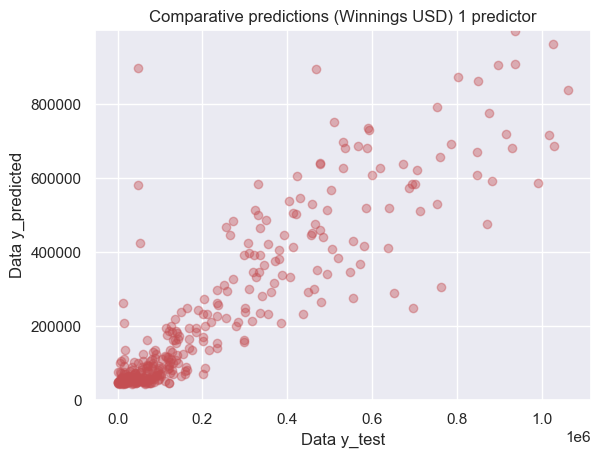

In [72]:
plt.scatter(y_test, prediction, alpha = 0.4, color = 'r')
plt.xlabel('Data y_test')
plt.ylabel('Data y_predicted')
plt.title('Comparative predictions (Winnings USD) 1 predictor')
plt.ylim([0, 999999])
plt.ylim([0, 999999])
plt.show()

In [17]:
first_model.score(x_test, y_test)

0.7817960744400381

The result got in the cell above through **score** function, help us to understand that the $R^{2}$ equal to 78.17% to this first case explain the variation in Winnings (in USD) thanks to the predictor __BreakPointsOpportunities__.

### Second model

Now, We apply the model applied above but with two predictors:

In [18]:
two_features = data_atp[['BreakPointsOpportunities', 'FirstServeReturnPointsWon']]
outcome_v2 = data_atp[['Winnings']]

In [19]:
x_train_model2, x_test_model2, y_train_model2, y_test_model2 = train_test_split(two_features, outcome_v2, train_size= 0.8)

In [20]:
second_model = LinearRegression()

In [21]:
second_model.fit(x_train_model2, y_train_model2)

LinearRegression()

In [22]:
second_prediction = second_model.predict(x_test_model2)

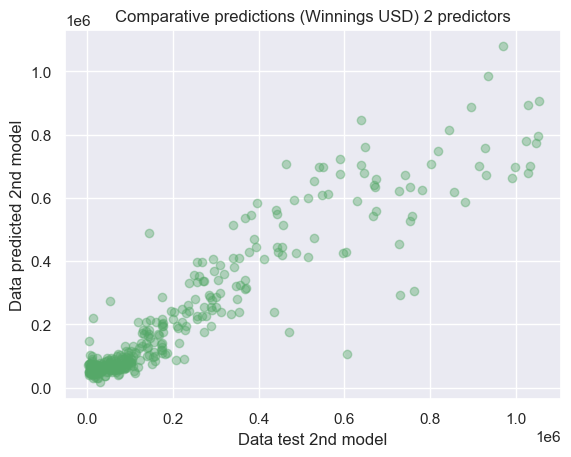

In [66]:
plt.scatter(y_test_model2, second_prediction, alpha = 0.4, color = 'g')
plt.xlabel('Data test 2nd model')
plt.ylabel('Data predicted 2nd model')
plt.title('Comparative predictions (Winnings USD) 2 predictors')
plt.ylim([0, 999999])
plt.ylim([0, 999999])
plt.show()

In [25]:
second_model.score(xThe result got in the cell above through **score** function, help us to understand that the $R^{2}$ equal to 78.17% to this first case explain the variation in Winnings (in USD) thanks to the predictor __BreakPointsOpportunities__._test_model2, y_test_model2)

0.860412525474885

The result got in the cell above through **score** function, help us to understand that the $R^{2}$ equal to 86.04% to this second case explain the variation in Winnings (in USD) thanks to the predictors __BreakPointsOpportunities__ and **FirstServeReturnPointsWon**.

### Third model

Now, We apply the model applied above but with multiple predictors:

In [28]:
multiple_features = data_atp[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome_v3 = data_atp[['Winnings']]

In [29]:
x_train_model3, x_test_model3, y_train_model3, y_test_model3 = train_test_split(multiple_features, outcome_v3, train_size= 0.8)

In [30]:
final_model = LinearRegression()

In [31]:
final_model.fit(x_train_model3, y_train_model3)

LinearRegression()

In [32]:
final_prediction = final_model.predict(x_test_model3)

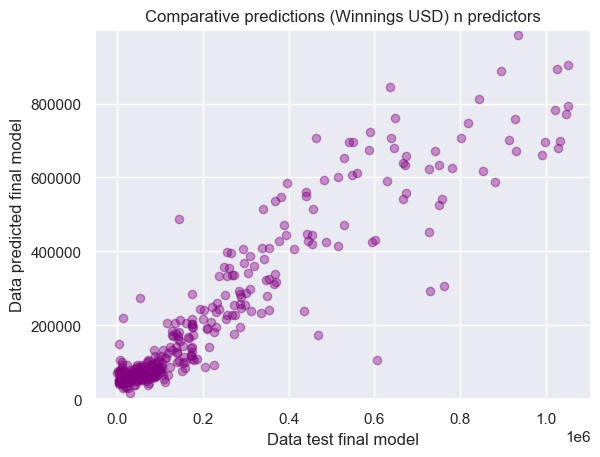

In [71]:
plt.scatter(y_test_model2, second_prediction, alpha = 0.4, color = 'purple')
plt.xlabel('Data test final model')
plt.ylabel('Data predicted final model')
plt.title('Comparative predictions (Winnings USD) n predictors')
plt.ylim([0, 999999])
plt.ylim([0, 999999])
plt.show()

In [35]:
final_model.score(x_test_model3, y_test_model3)

0.8047787157016919

The result got in the cell above through **score** function, help us to understand that the $R^{2}$ equal to 80.47% to this final case explain the variation in Winnings (in USD) thanks to the multiple predictors. 

## Final comments:

1. It's essential get all the knowledge about the business cases (in this example, Tennis).
2. Could appreciate the multiple correlation between the predictors and target variables.
3. Try multiple ways to get information and results